# Advanced Lane Finding Project

## 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

### Calibrate the camera using chessboard images

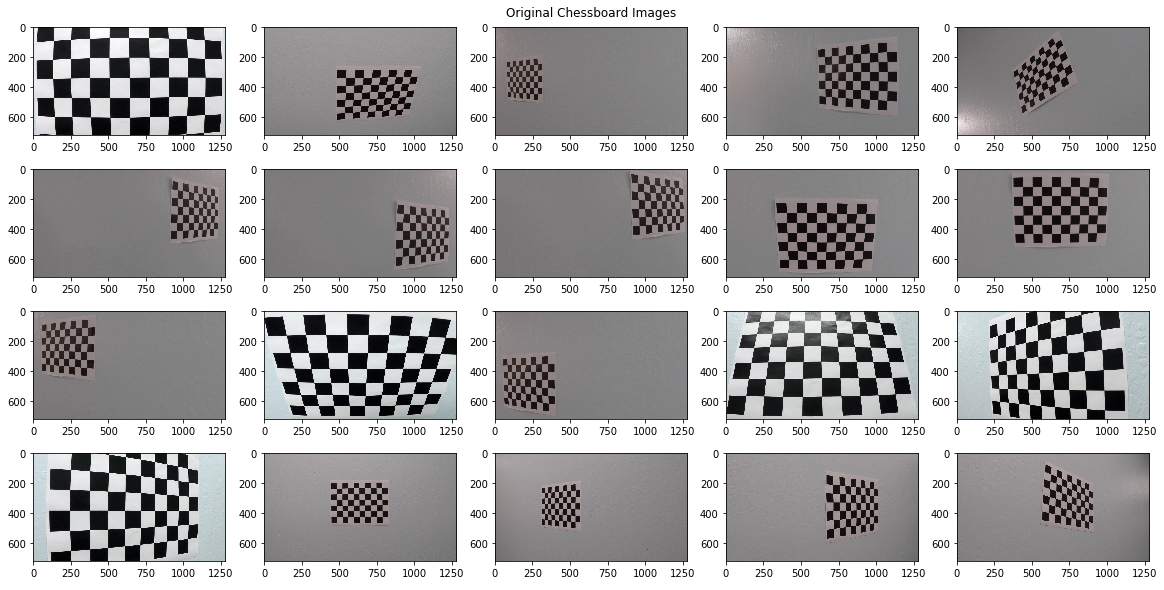

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# List of calibration images
img_fnames = glob.glob('./camera_cal/calibration*.jpg')


# Show the chessboard images
chess_imgs = plt.figure(figsize=(20, 10))
plt.title('Original Chessboard Images')
plt.axis('off')
current_pos = 1
columns = 5
rows = 4
for file in img_fnames:
    img = cv2.imread(file)
    chess_imgs.add_subplot(rows, columns, current_pos)
    plt.imshow(img)
    current_pos += 1    
plt.show()

### Find the chessboard corners and draw them

Unable to find corners for image: [ 1 ]
Unable to find corners for image: [ 15 ]
Unable to find corners for image: [ 16 ]


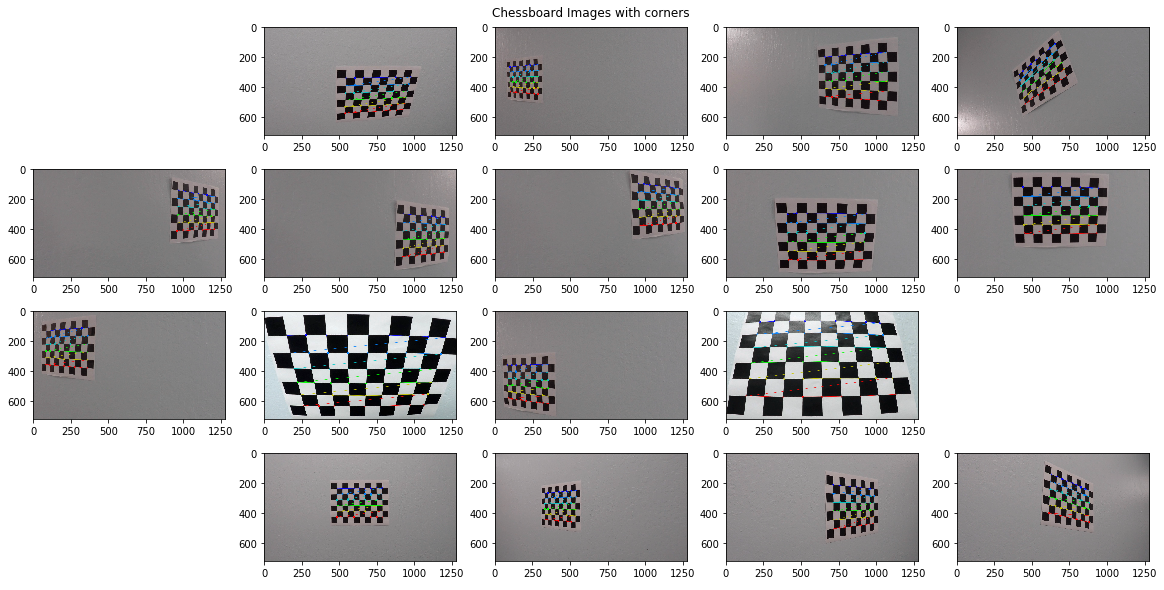

In [20]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to stores object and image points for all images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Make a grid figure to display the images with the corners (when found) so that all the images can be shown at once
chess_imgs_with_corners = plt.figure(figsize=(20, 10))
plt.title('Chessboard Images with corners')
plt.axis('off')
current_pos = 1
columns = 5
rows = 4

# Find the chessboard corners and show them for each calibration image
for file in img_fnames:
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chesboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
    
        # Draw and add the images with the chessboard corners drawn to the bigger figure
        img = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        chess_imgs_with_corners.add_subplot(rows, columns, current_pos)        
        plt.imshow(img)
    else:
        print('Unable to find corners for image: [ %s ]' % current_pos)
    current_pos += 1
plt.show()

### Calibrate the camera and show the calibration images undistorted

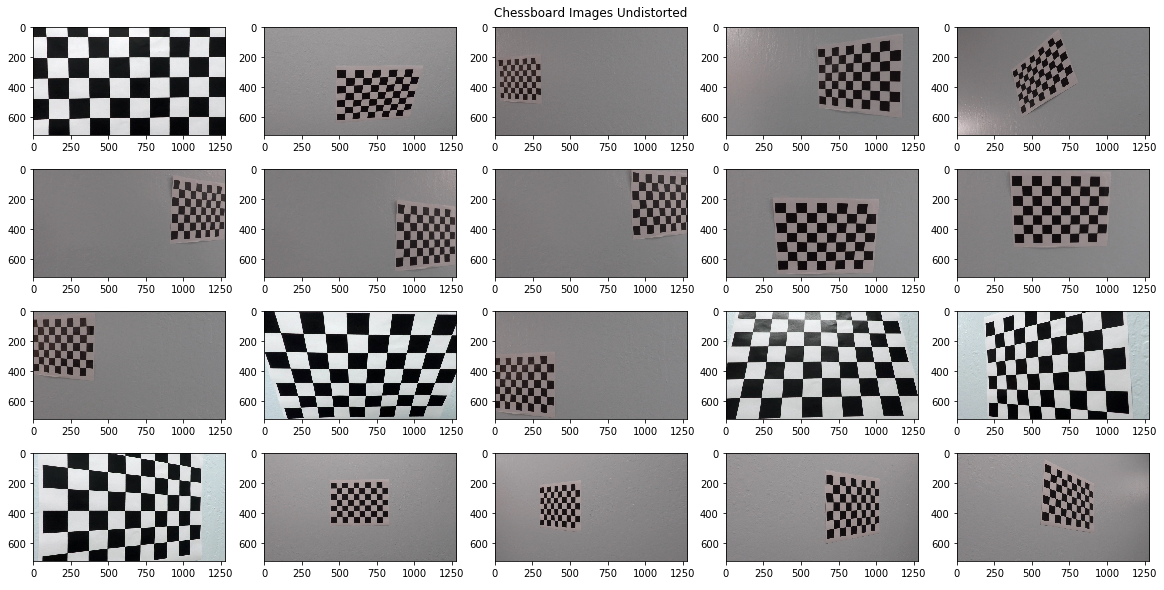

In [37]:
# Calculate camera matrix, distorition coefficents, rotation vectors, and translation vectors
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Make a grid figure to display the undistored calibration images so that all the images can be shown at once
chess_imgs_undistorted = plt.figure(figsize=(20, 10))
plt.title('Chessboard Images Undistorted')
plt.axis('off')
current_pos = 1
columns = 5
rows = 4

for file in img_fnames:
    img = cv2.imread(file)
    img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    chess_imgs_undistorted.add_subplot(rows, columns, current_pos)
    plt.imshow(img_undistorted)
    current_pos += 1
  
plt.show()
    

## 2. Apply a distortion correction to raw images.

./test_images/straight_lines1.jpg
./test_images/straight_lines2.jpg
./test_images/test1.jpg
./test_images/test2.jpg
./test_images/test3.jpg
./test_images/test4.jpg
./test_images/test5.jpg
./test_images/test6.jpg


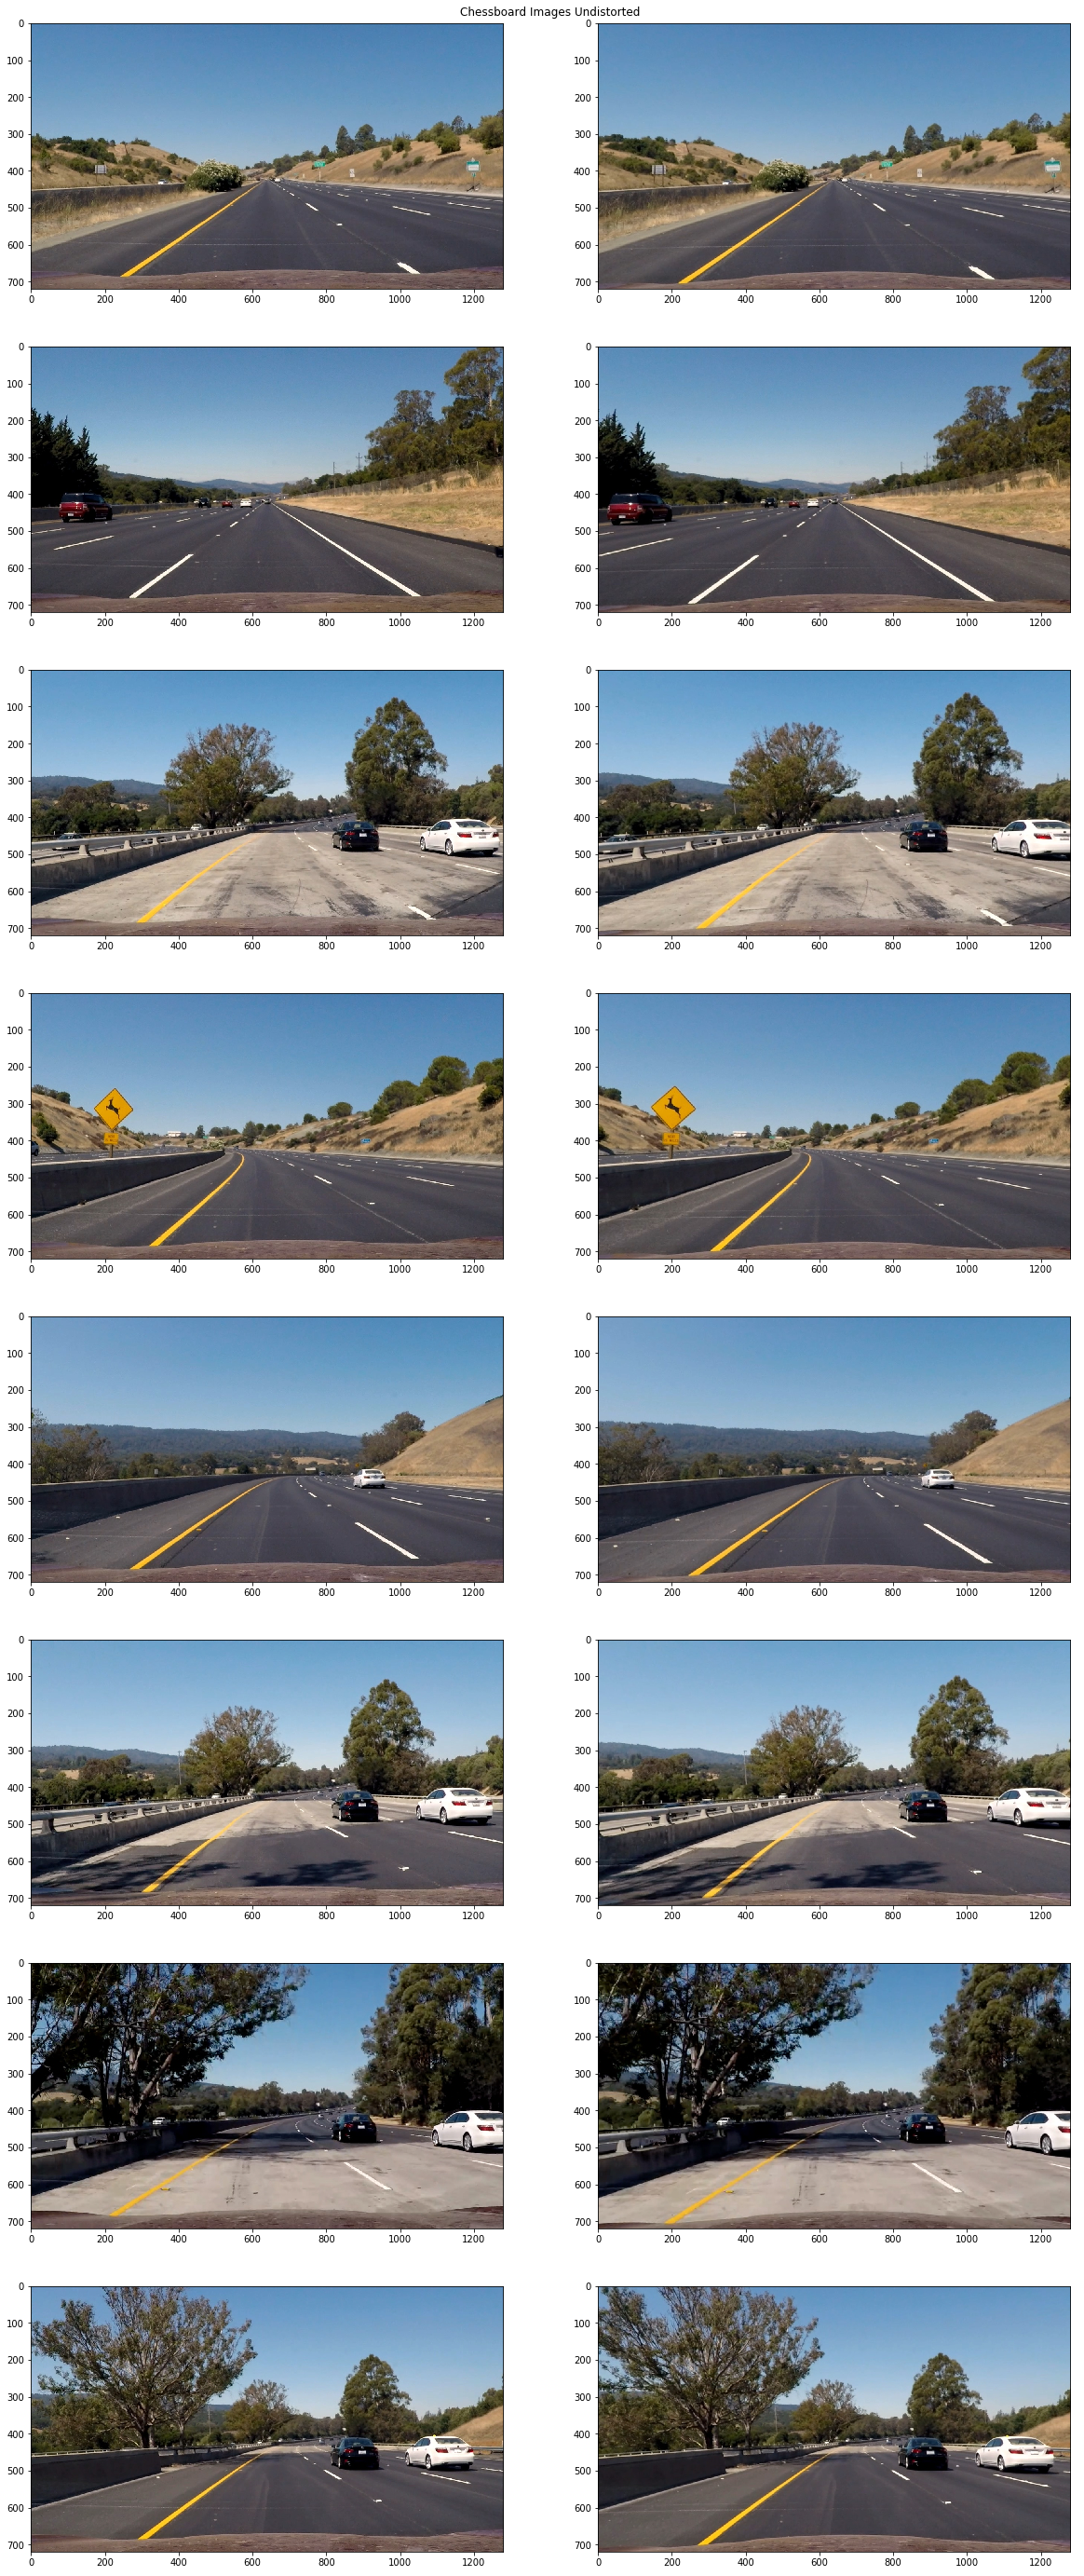

In [50]:
# load the test images
test_img_fnames = glob.glob('./test_images/*.jpg')

# Make a grid figure to display the test images (original on left side, undestorted on the right side)
test_images_grid = plt.figure(figsize=(20, 50))
plt.title('Chessboard Images Undistorted')
plt.axis('off')
current_pos = 1
columns = 2
rows = 8


for file in test_img_fnames:
    img = cv2.imread(file)
    img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_undistorted = cv2.cvtColor(img_undistorted, cv2.COLOR_BGR2RGB)
    
    test_images_grid.add_subplot(rows, columns, current_pos)
    plt.imshow(img)
    test_images_grid.add_subplot(rows, columns, current_pos+1)
    plt.imshow(img_undistorted)
    
    current_pos += 2
plt.show()
    

## 3. Use color transforms, gradients, etc., to create a thresholded binary image

## 4. Apply a perspective transform to rectify binary image ("birds-eye view")

## 5. Detect lane pixels and fit to find the lane boundary

## 6. Determine the curvature of the lane and vehicle position with respect to center

## 7. Warp the detected lane boundaries back onto the original image

## 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position